## Supervised Learning 

This notebook follows the module 2 videos to illustrate an overview of concepts of supervised machine learning


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_friedman1, make_classification

from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


In [15]:
#load fruit data
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
y_frits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

cmap_bold = ListedColormap(['#FFFF00', '#00F00', '#0000FF', '#000000'])

#make low-dimensional set 
X_fruits_2d = fruits[['height', 'width']]
y_frits_2d = fruits['fruit_label']

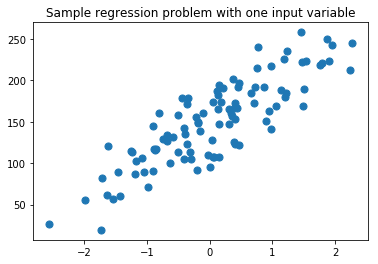

In [16]:
#synthetic datasets allow for easy low-dimensional visualization
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0, noise=25, random_state=0)

plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

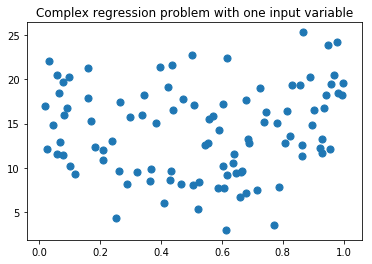

In [17]:
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50, cmap=cmap_bold)
plt.show()

In [ ]:
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, 
                                n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=0)
#plt.show()

In [ ]:
#to perform lse linear regression
#linear regression: least-squares ~12 min

#ridge regression is similar to lse linear regression except that it adds a 
#regularizing penalty during training that allows the model to better generalize for new data


#### Feature preprocessing:
Using MinMaxScaler()

In [ ]:
#MinMax scaling
#it is important to first normalize each feature x by translating every value of each feature into a value btw 0 and 1:
#first compute minimum and maximum values for each feature in training data, then for each instance:
#x_in_normal = (x_in - x_in_min)/(x_in_max - x_in_min)

#to do this with a tool in sklearn
from sklearn.preprocessing
"""
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = Ridge().fit(X_train_scaled, y_train)
r2_score = clf.score(X_test_scaled, y_test)
"""

#it can be more efficient to fit and transform together using the fit_transform method on training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


### ridge regression with normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_ssplit(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#items ending in _ are generated from training set
linridge = Ridge(alpha-20.0).fit(X_train_scaled, y_train)
print('dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R=squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_!=0)))
 

In [ ]:
#polynomial regression
poly = PolynomialFeatures(degree-2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)

#variables ending with '_' represent values generated by trained model
linreg = LinearRegression().fit(X_train, y_train)
print(linreg.coef_)
print(linreg.intercept_)